# 第4章: 言語解析

問題30から問題35までは、以下の文章`text`（太宰治の『走れメロス』の冒頭部分）に対して、言語解析を実施せよ。問題36から問題39までは、国家を説明した文書群（日本語版ウィキペディア記事から抽出したテキスト群）をコーパスとして、言語解析を実施せよ。

In [1]:
!pip install mecab-python3
!pip install ipadic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.8/588.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 52.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ipadic: filename=ipadic-1.0.0-py3-none-any.whl size=13556704 sha256=080180564a51c8f4accad49094de3c3f6bf7885042a4bf032d9a608bf129e528
  Stored in directory: /root/.cache/pip/wheels/44/56/37/f543963822b85260c9f948df8fac8c20169c80dc71b24dc407
Successfully built ipadic


In [2]:
text = """
メロスは激怒した。
必ず、かの邪智暴虐の王を除かなければならぬと決意した。
メロスには政治がわからぬ。
メロスは、村の牧人である。
笛を吹き、羊と遊んで暮して来た。
けれども邪悪に対しては、人一倍に敏感であった。
"""

## 30. 動詞
文章`text`に含まれる動詞をすべて表示せよ。

In [40]:
import MeCab
import ipadic
import pandas as pd
import io
tagger = MeCab.Tagger(ipadic.MECAB_ARGS)

taged_text = tagger.parse(text)
f = io.StringIO(taged_text)

df = pd.read_csv(f, sep='\s', header=None)
df[['品詞', '品詞細分類1', '品詞細分類2', '品詞細分類3', '活用型', '活用形', '原形', '読み', '発音']] = df[1].str.split(',', expand= True)
df


<ipython-input-40-c4994c8e9905>:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(f, sep='\s', header=None)


,0,1,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,メロス,"名詞,一般,*,*,*,*,*",名詞,一般,*,*,*,*,*,None,None
1,は,"助詞,係助詞,*,*,*,*,は,ハ,ワ",助詞,係助詞,*,*,*,*,は,ハ,ワ
2,激怒,"名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド",名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド
3,し,"動詞,自立,*,*,サ変・スル,連用形,する,シ,シ",動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
4,た,"助動詞,*,*,*,特殊・タ,基本形,た,タ,タ",助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
...,...,...,...,...,...,...,...,...,...,...,...
62,で,"助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ",助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
63,あっ,"助動詞,*,*,*,五段・ラ行アル,連用タ接続,ある,アッ,アッ",助動詞,*,*,*,五段・ラ行アル,連用タ接続,ある,アッ,アッ
64,た,"助動詞,*,*,*,特殊・タ,基本形,た,タ,タ",助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
65,。,"記号,句点,*,*,*,*,。,。,。",記号,句点,*,*,*,*,。,。,。


In [4]:
verbs_df = df[df['品詞'] == '動詞']
verbs_df[0]

,0
3,し
14,除か
17,なら
21,し
29,わから
43,吹き
47,遊ん
49,暮し
51,来


In [5]:
#いやがらせ

tex ="すもももももももものうち"
taged_tex = tagger.parse(tex)
f = io.StringIO(taged_tex)

dfra = pd.read_csv(f, sep='\s', header=None)
dfra

<ipython-input-5-fba01d208dc8>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dfra = pd.read_csv(f, sep='\s', header=None)


,0,1
0,すもも,"名詞,一般,*,*,*,*,すもも,スモモ,スモモ"
1,も,"助詞,係助詞,*,*,*,*,も,モ,モ"
2,もも,"名詞,一般,*,*,*,*,もも,モモ,モモ"
3,も,"助詞,係助詞,*,*,*,*,も,モ,モ"
4,もも,"名詞,一般,*,*,*,*,もも,モモ,モモ"
5,の,"助詞,連体化,*,*,*,*,の,ノ,ノ"
6,うち,"名詞,非自立,副詞可能,*,*,*,うち,ウチ,ウチ"
7,EOS,None


## 31. 動詞の原型
文章`text`に含まれる動詞と、その原型をすべて表示せよ。

In [6]:
verbs_df = df[df['品詞'] == '動詞']
verbs_df[[0,"原形"]]

,0,原形
3,し,する
14,除か,除く
17,なら,なる
21,し,する
29,わから,わかる
43,吹き,吹く
47,遊ん,遊ぶ
49,暮し,暮す
51,来,来る


## 32. 「AのB」
文章`text`において、2つの名詞が「の」で連結されている名詞句をすべて抽出せよ。

In [7]:
len(df)

67

In [8]:
noun_phrages = []

for i in range(len(df) - 2):
  if df.iloc[i]['品詞'] == '名詞' and  df.iloc[i + 1][0] == 'の' and df.iloc[i + 2]['品詞'] == '名詞':
    noun_phrages.append(df.iloc[i][0] + 'の' + df.iloc[i + 2][0])

noun_phrages



['暴虐の王', '村の牧人']

## 33. 係り受け解析

文章`text`に係り受け解析を適用し、係り元と係り先のトークン（形態素や文節などの単位）をタブ区切り形式ですべて抽出せよ。

In [9]:
!pip install spacy
!pip install -U ja_ginza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.0 MB/s eta 0:00:00


In [20]:
import ginza
import spacy

nlp = spacy.load("ja_ginza")
doc = nlp(text)

for token in doc:
  print(f"{token.text}\t-->\t{token.head.text}")


	-->	メロス
メロス	-->	激怒
は	-->	メロス
激怒	-->	激怒
し	-->	激怒
た	-->	激怒
。	-->	激怒

	-->	

必ず	-->	除か
、	-->	必ず
かの	-->	暴虐
邪智	-->	暴虐
暴虐	-->	王
の	-->	暴虐
王	-->	除か
を	-->	王
除か	-->	決意
なけれ	-->	除か
ば	-->	なけれ
なら	-->	なけれ
ぬ	-->	なけれ
と	-->	除か
決意	-->	決意
し	-->	決意
た	-->	決意
。	-->	決意

	-->	メロス
メロス	-->	わから
に	-->	メロス
は	-->	メロス
政治	-->	わから
が	-->	政治
わから	-->	わから
ぬ	-->	わから
。	-->	わから

	-->	メロス
メロス	-->	牧人
は	-->	メロス
、	-->	メロス
村	-->	牧人
の	-->	村
牧人	-->	牧人
で	-->	牧人
ある	-->	で
。	-->	牧人

	-->	笛
笛	-->	吹き
を	-->	笛
吹き	-->	暮し
、	-->	吹き
羊	-->	遊ん
と	-->	羊
遊ん	-->	暮し
で	-->	遊ん
暮し	-->	暮し
て	-->	暮し
来	-->	て
た	-->	暮し
。	-->	暮し

	-->	邪悪
けれど	-->	

も	-->	

邪悪	-->	敏感
に	-->	邪悪
対し	-->	に
ては	-->	に
、	-->	邪悪
人	-->	倍
一	-->	倍
倍	-->	敏感
に	-->	倍
敏感	-->	敏感
で	-->	敏感
あっ	-->	で
た	-->	敏感
。	-->	敏感

	-->	



## 34. 主述の関係
文章`text`において、「メロス」が主語であるときの述語を抽出せよ。

In [21]:
for token in doc:
  if token.dep_ == 'nsubj' and token.text == 'メロス':
    print(token.head.text)

激怒
牧人


## 35. 係り受け木
「メロスは激怒した。」の係り受け木を可視化せよ。

In [33]:
import spacy
from spacy import displacy

nlp = spacy.load("ja_ginza")
doc = nlp(text)

options = {"font_size": 5, "distance": 90}
displacy.render(doc, style="dep", jupyter=True, options=options)

## 36. 単語の出現頻度

問題36から39までは、Wikipediaの記事を以下のフォーマットで書き出したファイル[jawiki-country.json.gz](/data/jawiki-country.json.gz)をコーパスと見なし、統計的な分析を行う。

* 1行に1記事の情報がJSON形式で格納される
* 各行には記事名が"title"キーに、記事本文が"text"キーの辞書オブジェクトに格納され、そのオブジェクトがJSON形式で書き出される
* ファイル全体はgzipで圧縮される

まず、第3章の処理内容を参考に、Wikipedia記事からマークアップを除去し、各記事のテキストを抽出せよ。そして、コーパスにおける単語（形態素）の出現頻度を求め、出現頻度の高い20語とその出現頻度を表示せよ。

In [34]:
!git clone https://github.com/Tomhack24/my_nlp100_2025.git
!gunzip /content/my_nlp100_2025/data/jawiki-country.json.gz

Cloning into 'my_nlp100_2025'...
remote: Enumerating objects: 247, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 247 (delta 44), reused 25 (delta 25), pack-reused 185 (from 3)
Receiving objects: 100% (247/247), 21.10 MiB | 17.73 MiB/s, done.
Resolving deltas: 100% (123/123), done.


In [57]:
import json
import re
from collections import Counter

texts = ''
with open('/content/my_nlp100_2025/data/jawiki-country.json', 'r') as f:
  for line in f:
    if(json.loads(line)['title'] == '日本'):
      texts += json.loads(line)['text']

texts = re.sub(r'\'{2,5}', '', texts)
texts = re.sub(r'\[\[(?!ファイル)([^\|]+?)\]\]', r'\1', texts)
texts = re.sub(r'\[\[(?!ファイル)(?:[^\|]*)\|*(.*?)\]\]', r'\1', texts)
texts = re.sub(r'\{\{[^\|]+?\}\}', '', texts)
texts = re.sub(r'\{\{(?:lang|仮リンク)(?:.*?)\|([^\|]*?)\}\}', r'\1', texts)
texts = re.sub(r'\{\{.+?\}\}', '', texts)
texts = re.sub(r'<.+?>', '', texts)
texts = re.sub(r'\[\[ファイル:([^\|]+?)\|.*?\]\]', r'\1', texts)
texts = re.sub(r'\[.+?\]', '', texts)

node = tagger.parseToNode(texts)
words = []
while node:
    words.append(node.surface)
    node = node.next

# 出現頻度をカウント
word_counts = Counter(words)

# 出現頻度の高い上位20語を取得
top_20 = word_counts.most_common(20)

# 結果を表示
print("上位20語:")
for word, count in top_20:
    print(f"{word}: {count}")


上位20語:
、: 3036
の: 3001
に: 1604
。: 1533
が: 1469
は: 1437
を: 1360
た: 1063
で: 1015
と: 1002
て: 881
し: 866
日本: 746
（: 706
）: 667
年: 645
」: 632
「: 570
・: 471
いる: 462


## 37. 名詞の出現頻度
コーパスにおける名詞の出現頻度を求め、出現頻度の高い20語とその出現頻度を表示せよ。

In [61]:
from collections import Counter
import MeCab
import ipadic


mecab = MeCab.Tagger(ipadic.MECAB_ARGS)
node = mecab.parseToNode(texts)

words_37 = []
while node:
    # 名詞であるかをチェック
    if node.feature.split(',')[0] == '名詞':
        words_37.append(node.surface)
    node = node.next

word_counts = Counter(words_37)

top_20 = word_counts.most_common(20)

# 結果を表示
print("上位20語(名詞):")
for word, count in top_20:
    print(f"{word}: {count}")


上位20語(名詞):
日本: 746
年: 645
国: 245
的: 217
日: 188
人: 167
こと: 162
県: 162
世界: 160
月: 156
3: 151
1: 139
2: 136
関係: 123
経済: 117
中国: 112
ため: 94
地域: 93
4: 88
地方: 88


## 38. TF・IDF
日本に関する記事における名詞のTF・IDFスコアを求め、TF・IDFスコア上位20語とそのTF, IDF, TF・IDFを表示せよ。

In [66]:
from collections import Counter
import MeCab
import ipadic


mecab = MeCab.Tagger(ipadic.MECAB_ARGS)
node = mecab.parseToNode(texts)

words_37 = []
while node:
    # 名詞であるかをチェック
    if node.feature.split(',')[0] == '名詞':
        words_37.append(node.surface)
    node = node.next

tf = Counter(words_37)


# IDFの設定 (単一文書なので、ここでは簡略化)
idf = 1

# TF-IDFの算出
tfidf_scores = {}
for term, freq in tf.items():
    tfidf_scores[term] = freq * idf

# TF-IDFスコアでソートし、上位20語を表示
sorted_tfidf = sorted(tfidf_scores.items(), key=lambda item: item[1], reverse=True)
top_20_tfidf = sorted_tfidf[:20]


for term, tfidf in top_20_tfidf:
    term_freq = tf[term]
    print(f"{term}, TF: {term_freq}, IDF: {idf:.4f}, TF-IDF: {tfidf:.4f}")


日本, TF: 746, IDF: 1.0000, TF-IDF: 746.0000
年, TF: 645, IDF: 1.0000, TF-IDF: 645.0000
国, TF: 245, IDF: 1.0000, TF-IDF: 245.0000
的, TF: 217, IDF: 1.0000, TF-IDF: 217.0000
日, TF: 188, IDF: 1.0000, TF-IDF: 188.0000
人, TF: 167, IDF: 1.0000, TF-IDF: 167.0000
こと, TF: 162, IDF: 1.0000, TF-IDF: 162.0000
県, TF: 162, IDF: 1.0000, TF-IDF: 162.0000
世界, TF: 160, IDF: 1.0000, TF-IDF: 160.0000
月, TF: 156, IDF: 1.0000, TF-IDF: 156.0000
3, TF: 151, IDF: 1.0000, TF-IDF: 151.0000
1, TF: 139, IDF: 1.0000, TF-IDF: 139.0000
2, TF: 136, IDF: 1.0000, TF-IDF: 136.0000
関係, TF: 123, IDF: 1.0000, TF-IDF: 123.0000
経済, TF: 117, IDF: 1.0000, TF-IDF: 117.0000
中国, TF: 112, IDF: 1.0000, TF-IDF: 112.0000
ため, TF: 94, IDF: 1.0000, TF-IDF: 94.0000
地域, TF: 93, IDF: 1.0000, TF-IDF: 93.0000
4, TF: 88, IDF: 1.0000, TF-IDF: 88.0000
地方, TF: 88, IDF: 1.0000, TF-IDF: 88.0000


## 39. Zipfの法則
コーパスにおける単語の出現頻度順位を横軸、その出現頻度を縦軸として、両対数グラフをプロットせよ。

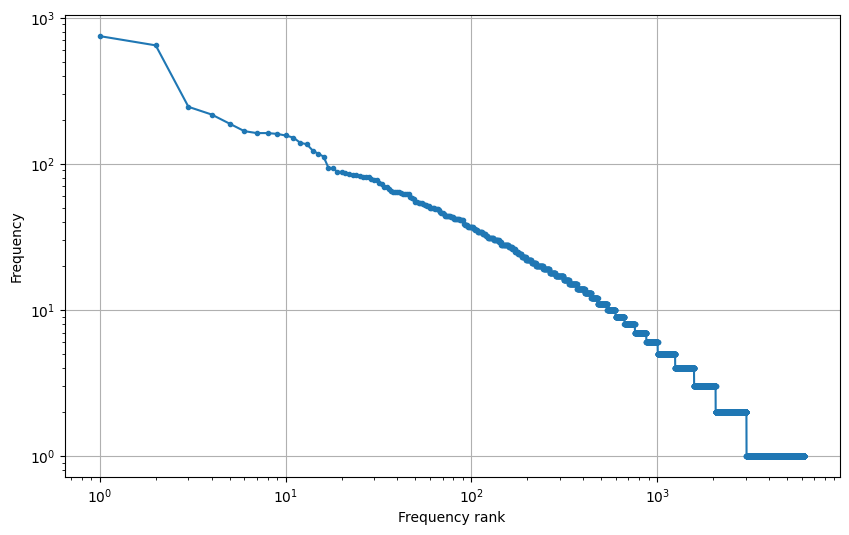

In [79]:
import matplotlib.pyplot as plt
import numpy as np
sorted_tf = tf.most_common()

# 単語と頻度に分割
words = [item[0] for item in sorted_tf]
frequencies = [item[1] for item in sorted_tf]

# 順位データを作成
ranks = np.arange(1, len(sorted_tf) + 1)

plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker='.', linestyle='-')
plt.xlabel('Frequency rank')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()